In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers_df = pd.read_csv(r"C:\Users\THAKALI\Downloads\Customers (2).csv")
transactions_df = pd.read_csv(r"C:\Users\THAKALI\Downloads\Transactions (2).csv")

In [4]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')

In [5]:
customer_features = merged_df.groupby('CustomerID').agg(
    total_purchase_value=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_transactions=('TransactionID', 'count'),
    product_count=('ProductID', lambda x: x.nunique())
).reset_index()

In [6]:
features = customer_features.drop(columns=['CustomerID'])

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\THAKALI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\THAKALI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\THAKALI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\THAKALI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

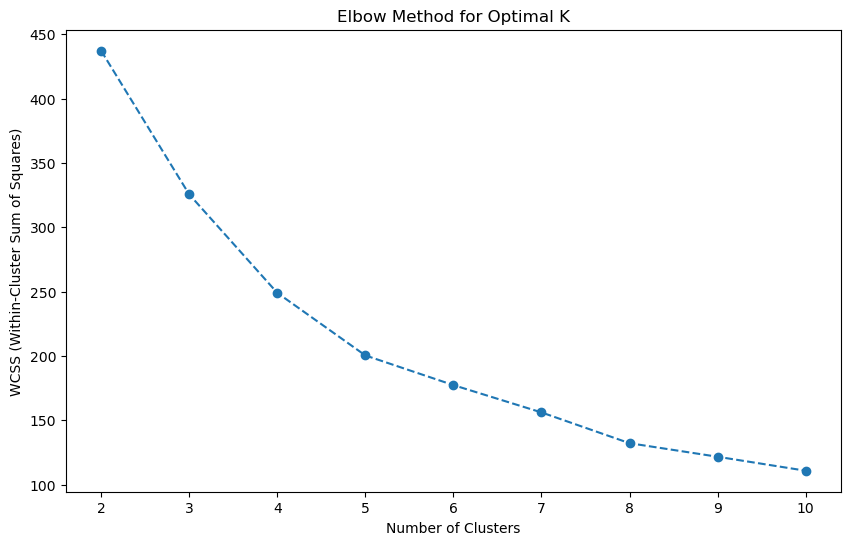

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


C:\Users\THAKALI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
customer_features['Cluster'] = cluster_labels

In [12]:
db_index = davies_bouldin_score(scaled_features, cluster_labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

Davies-Bouldin Index: 0.9120


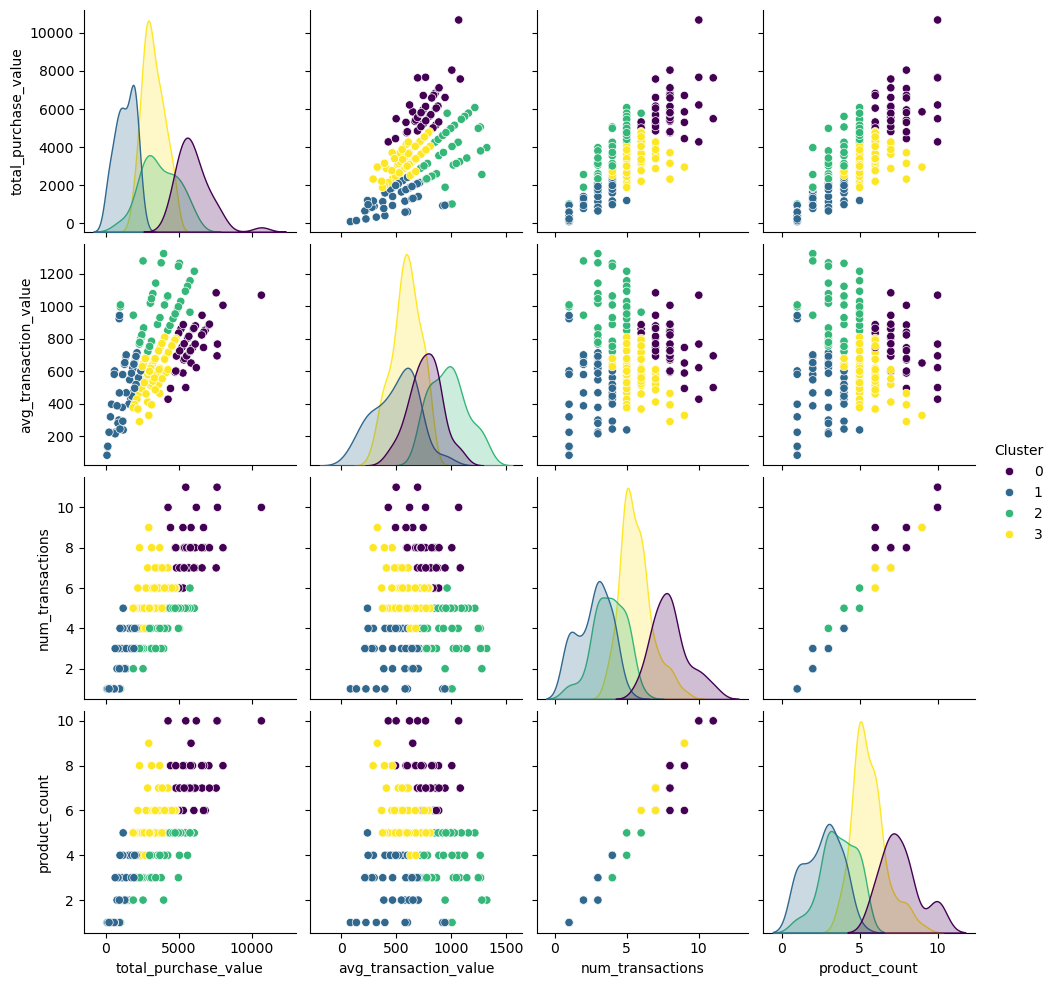

In [13]:
sns.pairplot(customer_features, hue='Cluster', palette='viridis')
plt.show()

In [14]:
customer_features.to_csv('FirstName_LastName_Clustering.csv', index=False)